$$J(u) = - \frac{1}{2}x(2)+\int_{0}^{2}(x^2(t)-u^2(t))dt \to min$$
$$\dot x = ux + x^2, \quad x(0)= 0, \quad \| u(t)\| \leq 1$$

### Функция Понтрягина
$$H(\psi, x, u, t) = \psi (ux+x^2) - x^2 + u^2$$
$$H_u = \psi x + 2u$$
$$H_x = - 2x+\psi u+2x\psi$$
$$\phi_x = -\frac{1}{2}$$

### Сопряженнаяя система
$$\dot \psi = -H_x = 2x(1-\psi)-\psi u, \quad \psi(2) = - \psi_x(2) = \frac{1}{2}$$

In [26]:
using LaTeXStrings
using Plots

In [40]:
t = 0:0.01:2

function dxdt(uk)
    delta_t = t[2]-t[1]
    n = length(uk)
    x = zeros(n)
    x[1] = 0
    for i = 2:n
        x[i] = x[i-1] + (uk[i-1]*x[i-1]+x[i-1]^2)*delta_t
    end
    return x
end

function dpsidt(xk, uk)
    delta_t = t[2]-t[1]
    n = length(xk)
    psi = zeros(n)
    psi[1] = 1/2
    for i = 2:n
        psi[i] =  psi[i-1] + (2*xk[i-1]*(1-psi[i-1])-psi[i-1]*uk[i-1])*delta_t
    end
    return psi
end

function Hu(xk, psik, uk)
    return psik.*xk + 2*uk
end

function argmax_v(Hk)
    n = length(Hk)
    v_var = -1:0.01:1
    arg = Hk * transpose(v_var)
    v = zeros(n)
    for i=1:n
        _, ind = findmax(arg[i, :])
        v[i] = v_var[ind]
    end
    return v
end

function delta_test(Hk, vk, uk)
    n = length(t)
    delta_t = t[2]-t[1]
    rez = 0
    for i=1:n
        rez += Hk[i]*(vk[i]-uk[i])*delta_t
    end
    println("delta t", delta_t)
    return delta_t == 0
end

function new_u(vk, uk)
    delta_t = t[2]-t[1]
    a = 0.1:0.01:0.9
    n = length(t)
    m = length(a)
    uk_a = ones(m)*transpose(uk) + a*transpose(vk-uk)
    J = zeros(m)
    for i = 1:m
        u_ai = uk_a[i, :]
        x_ai = dxdt(u_ai)
        J[i] = - 0.5 * x_ai[end]
        for k = 1:n-1
            J[i] += (x_ai[k]^2 - u_ai[k]^2)*delta_t
        end
    end
    J_min, ind = findmin(J)
    return uk + a[ind]*(vk-uk), J_min 
end

new_u (generic function with 1 method)

In [41]:
m = 25
n = length(t)
U = zeros(m, n)
X = zeros(m, n)
u0 = ones(n)*0.7
U[1, :] = u0

for i in 1:m-1
    u0 = U[i, :]
    x0 = dxdt(u0)
    X[i,:] = x0
    psi0 = dpsidt(x0, u0)
    H0 = Hu(x0, psi0, u0)
    v0 = argmax_v(H0)
    if ~delta_test(H0, v0, u0)
        u1, J = new_u(v0, u0)
        println(J)
        plot(t, [u0 u1], label=[L"u^k" L"u^{k+1}"],ylims=(-1,1),lw=3)
        u0 = u1
        U[i+1,:] = u0
    end
end

delta t0.01
-1.8818
delta t0.01
-1.988017999999994
delta t0.01
-1.9988001799999926
delta t0.01
-1.9998800018000027
delta t0.01
-1.9999880000180068
delta t0.01
-1.9999988000001774
delta t0.01
-1.9999998799999947
delta t0.01
-1.9999999880000006
delta t0.01
-1.999999998799993
delta t0.01
-1.9999999998800062
delta t0.01
-1.999999999988003
delta t0.01
-1.9999999999988025
delta t0.01
-1.999999999999877
delta t0.01
-1.9999999999999933
delta t0.01
-2.000000000000001
delta t0.01
-2.0000000000000013
delta t0.01
-2.0000000000000013
delta t0.01
-2.0000000000000013
delta t0.01
-2.0000000000000013
delta t0.01
-2.0000000000000013
delta t0.01
-2.0000000000000013
delta t0.01
-2.0000000000000013
delta t0.01
-2.0000000000000013
delta t0.01
-2.0000000000000013


[ Info: Saved animation to /home/daniil/program/julia/anim2_u.gif


Plots.AnimatedGif("/home/daniil/program/julia/anim2_u.gif")
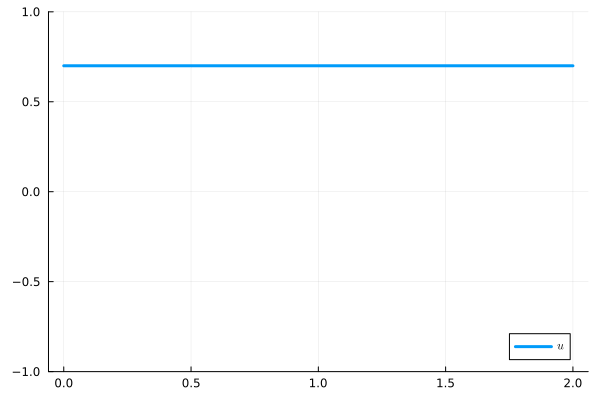

In [42]:
anim = @animate for i ∈ 1:m
    plot(t, [U[i, :]], label=L"u",ylims=(-1,1),lw=3)
end
gif(anim, "anim2_u.gif", fps = 5)

[ Info: Saved animation to /home/daniil/program/julia/anim2_x.gif


Plots.AnimatedGif("/home/daniil/program/julia/anim2_x.gif")
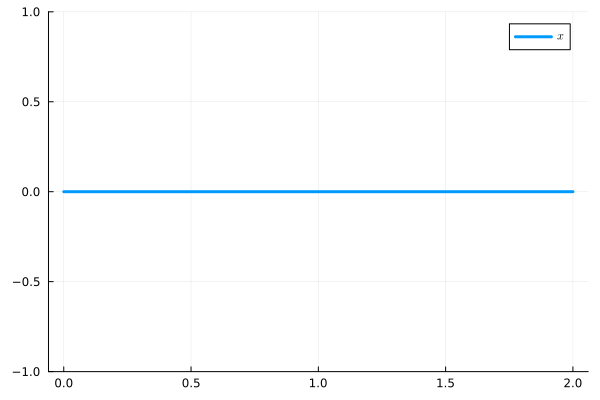

In [43]:
anim = @animate for i ∈ 1:m
    plot(t, [X[i, :]], label=L"x",ylims=(-1,1),lw=3)
end
gif(anim, "anim2_x.gif", fps = 5)